<a href="https://colab.research.google.com/github/Pamgerber/Processamento_Imagens-M2/blob/main/Pr%C3%A1tica3_Filtragem_Dom%C3%ADnio_Frequ%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade do Vale do Itajaí

Escola Politécnica

Processamento Digital de Sinais: Imagens

Professor Felipe Viel

M2- Pamela Bandeira Gerber e Ismar Pedrini

**Prática com Filtros no domínio da Frequência**

Tutoriais da OpenCV


*   https://docs.opencv.org/master/d9/df8/tutorial_root.html
*   https://www.geeksforgeeks.org/opencv-python-tutorial/

**Usando a DFT e FFT da OpenCV**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Filtragem_Dominio_Frequencia/Fig0424(a)(rectangle).tif', 0)

# Fourier 2D- DFT
f = np.fft.fft2(img)

# Frequência de zero para o centro da imagem
fshift = np.fft.fftshift(f)

# Magnitude do espectro
magnitude_spectrum = (20 * np.log(np.abs(fshift) + 0.00001) / 255)
magnitude_spectrum = np.array(magnitude_spectrum, dtype=np.float32)

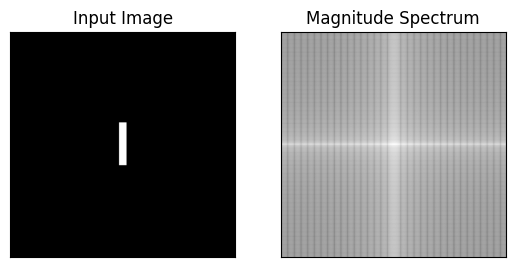

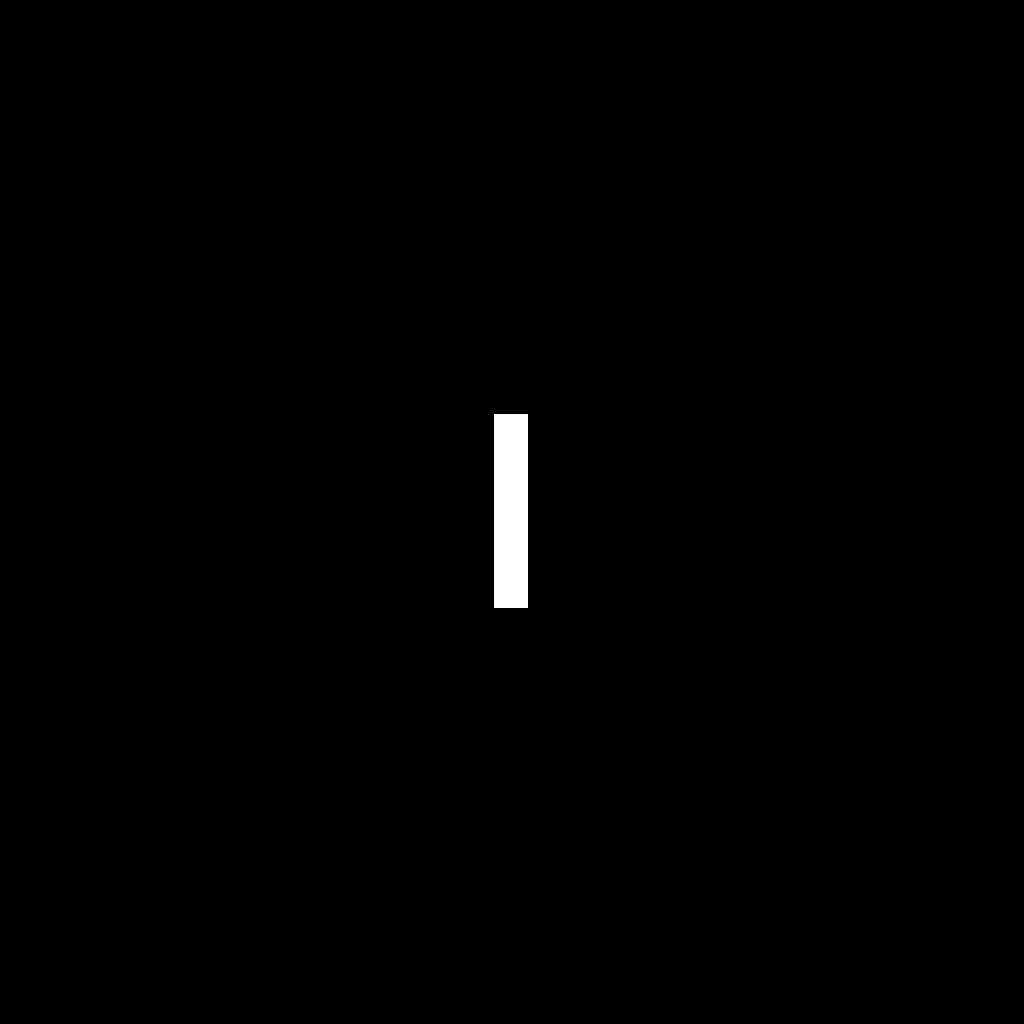

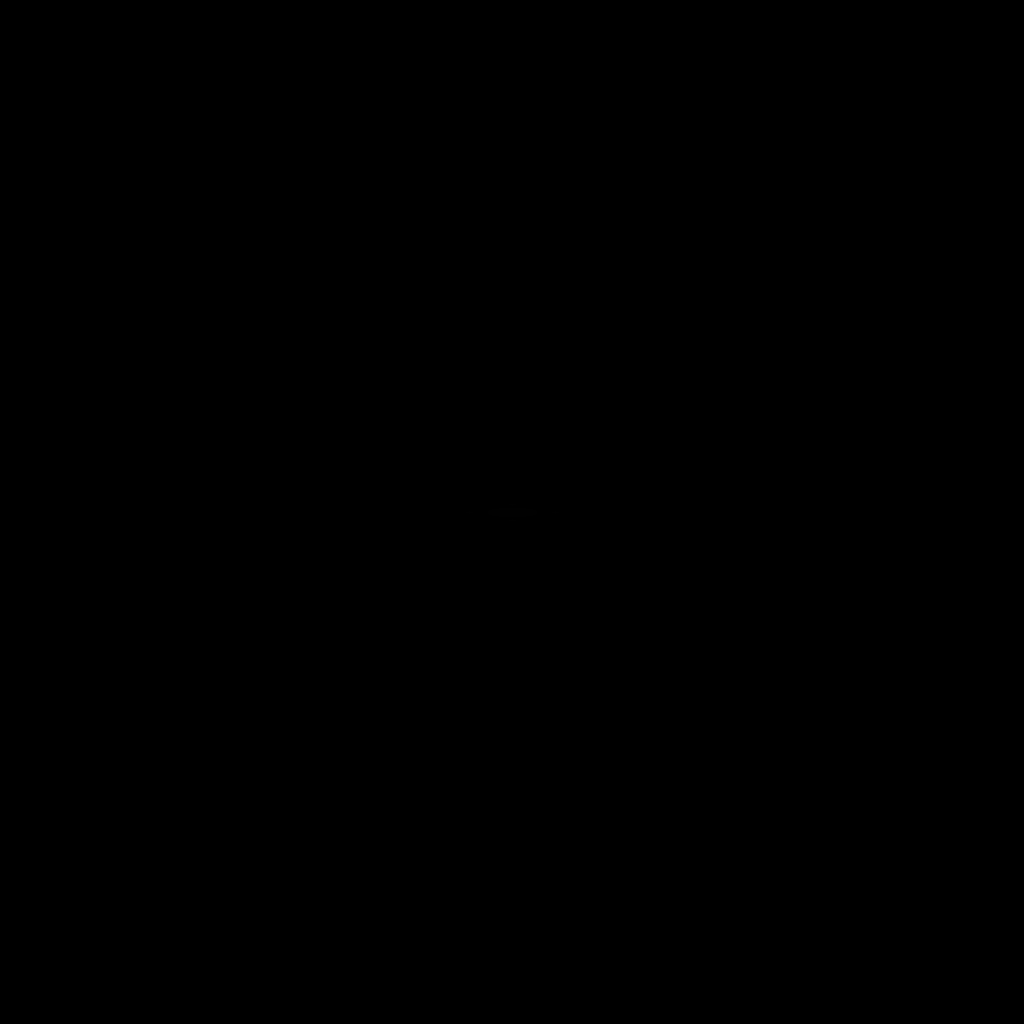

In [ ]:
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Mostrando a imagem de entrada
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Mostrando a magnitude da TF
cv2_imshow(magnitude_spectrum)
cv2.waitKey(0)
cv2.destroyAllWindows()

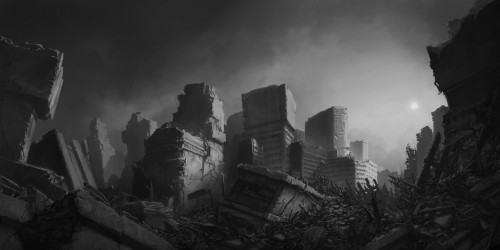

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Filtragem_Dominio_Frequencia/t1.jpg', 0)

# Converte a imagem de uint8 para float32
image_f32 = img.astype(np.float32)

dft = cv2.dft(image_f32, flags=cv2.DFT_COMPLEX_OUTPUT)
fft_shift = np.fft.fftshift(dft)

# Espectro de magnitude
magnitude_spectrum = 20 * np.log(cv2.magnitude(fft_shift[:, :, 0], fft_shift[:, :, 1]) + 0.00001)

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#criação da filtro PB ideal
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols, 2), np.uint8)
raio = 50  # Valor inteiro que determina a frequência de corte do filtro passa-baixa
mask[crow - raio:crow + raio, ccol - raio:ccol + raio] = 1

53414


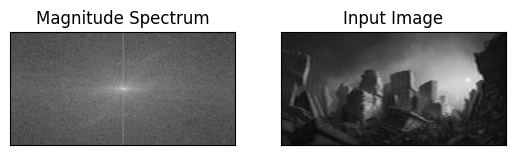

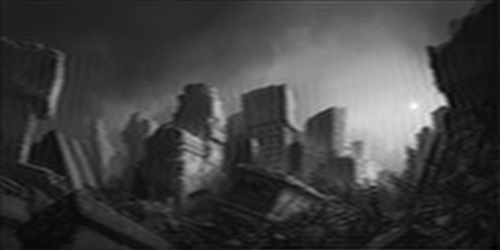

In [ ]:
fshift = fft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

img_back = np.array(img_back, dtype=np.float32)

print(np.argmax(img_back))
plt.subplot(121), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(img_back, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()

# Normaliza
img_back -= img_back.min()
img_back = img_back * 255 / img_back.max()
img_back = img_back.astype(np.uint8)

cv2_imshow(img_back)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#criação da filtro PA - segue-se o principio do PB, porém inverso
rows, cols = img.shape
crow, ccol = rows // 2, cols // 2
mask = np.ones((rows, cols, 2))
raio = 50
mask[crow - raio:crow + raio, ccol - raio:ccol + raio] = 0

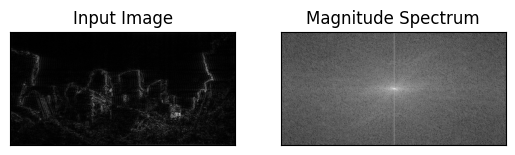

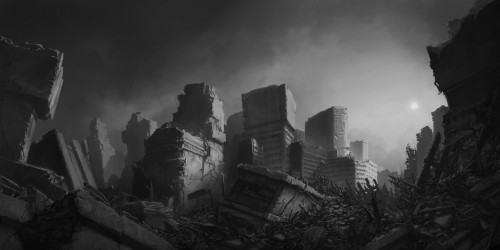

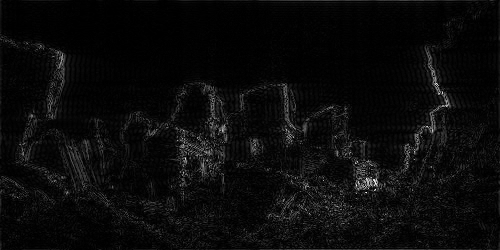

In [ ]:
# Aplicar máscara e inverso DFT
fshift = fft_shift * mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

img_back = np.array(img_back, dtype=np.float32)

plt.subplot(121), plt.imshow(img_back, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Normalizar a imagem para o intervalo de 0 a 255
img_back -= img_back.min()
img_back = img_back * 255 / img_back.max()
img_back = img_back.astype(np.uint8)

cv2_imshow(img)
cv2_imshow(img_back)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Criando outros kernels - Gaussiano e Butterworth**

In [ ]:
def createPB(shape, center, radius, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[0:rows, 0:cols]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(r**2 + c**2)
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal low-pass filter
        lpFilter = np.copy(d)
        lpFilter[d <= radius] = 1  # Seleciona a região com 1
        lpFilter[d > radius] = 0  # Seleciona a região com 0
    elif lpType == 1:  # Butterworth low-pass filter
        lpFilter = 1 / (1 + (d / radius)**(2 * n))
    elif lpType == 2:  # Gaussian low-pass filter
        lpFilter = np.exp(-d**2 / (2 * radius**2))
    lpFilter_matrix[:, :, 0] = lpFilter  # Atribuição para a primeira camada
    lpFilter_matrix[:, :, 1] = lpFilter  # Atribuição para a segunda camada
    return lpFilter_matrix

def createPA(shape, center, radius, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[0:rows, 0:cols]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(r**2 + c**2)
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal high-pass filter
        lpFilter = np.copy(d)
        lpFilter[d <= radius] = 0  # Seleciona a região com 0
        lpFilter[d > radius] = 1  # Seleciona a região com 1
    elif lpType == 1:  # Butterworth high-pass filter
        lpFilter = 1 / (1 + (radius / d)**(2 * n))
    elif lpType == 2:  # Gaussian high-pass filter
        lpFilter = 1 - np.exp(-d**2 / (2 * radius**2))
    lpFilter_matrix[:, :, 0] = lpFilter  # Atribuição para a primeira camada
    lpFilter_matrix[:, :, 1] = lpFilter  # Atribuição para a segunda camada
    return lpFilter_matrix

def createPF(shape, center, bandCenter, bandWidth, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[0:rows, 0:cols]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(r**2 + c**2)
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal bandpass filter
        lpFilter = np.copy(d)
        lpFilter[(d < bandCenter - bandWidth/2) | (d > bandCenter + bandWidth/2)] = 0  # Valor da região de rejeição
        lpFilter[(d >= bandCenter - bandWidth/2) & (d <= bandCenter + bandWidth/2)] = 1  # Valor da região de passagem
    elif lpType == 1:  # Butterworth bandpass filter
        lpFilter = 1 / (1 + ((d * bandWidth) / (d**2 - bandCenter**2))**(2 * n))
    elif lpType == 2:  # Gaussian bandpass filter
        lpFilter = np.exp(-d**2 / (2 * bandWidth**2)) * (1 - np.exp(-d**2 / (2 * bandCenter**2)))
    lpFilter_matrix[:, :, 0] = lpFilter  # Atribuição para a primeira camada
    lpFilter_matrix[:, :, 1] = lpFilter  # Atribuição para a segunda camada
    return lpFilter_matrix

def createRF(shape, center, bandCenter, bandWidth, lpType=2, n=2):
    rows, cols = shape[:2]
    r, c = np.mgrid[0:rows, 0:cols]
    c -= center[0]
    r -= center[1]
    d = np.sqrt(r**2 + c**2)
    lpFilter_matrix = np.zeros(shape, np.float32)
    if lpType == 0:  # Ideal band stop filter
        lpFilter = np.copy(d)
        lpFilter[(d >= bandCenter - bandWidth/2) & (d <= bandCenter + bandWidth/2)] = 0  # Valor da região de rejeição
        lpFilter[(d < bandCenter - bandWidth/2) | (d > bandCenter + bandWidth/2)] = 1  # Valor da região de passagem
    elif lpType == 1:  # Butterworth band stop filter
        lpFilter = 1 / (1 + ((d**2 - bandCenter**2) / (d * bandWidth))**(2 * n))
    elif lpType == 2:  # Gaussian band stop filter
        lpFilter = 1 - np.exp(-d**2 / (2 * bandWidth**2)) * (1 - np.exp(-d**2 / (2 * bandCenter**2)))
    lpFilter_matrix[:, :, 0] = lpFilter  # Atribuição para a primeira camada
    lpFilter_matrix[:, :, 1] = lpFilter  # Atribuição para a segunda camada
    return lpFilter_matrix

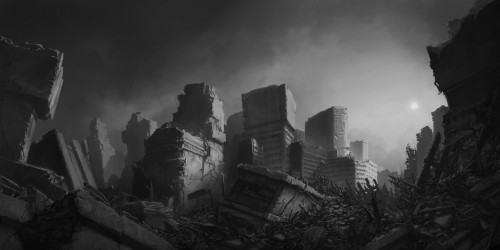

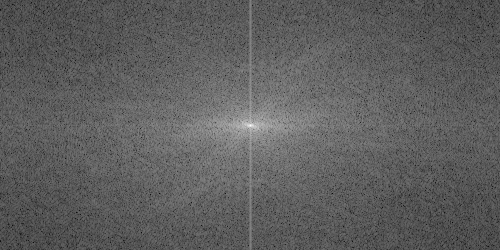

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Filtragem_Dominio_Frequencia/t1.jpg', 0)

# Converte a imagem de uint8 para float32
image_f32 = np.float32(img)

# Aplica DFT
dft = cv2.dft(image_f32, flags=cv2.DFT_COMPLEX_OUTPUT)

# Aplicar a FFT e deslocamento do espectro
fft_shift = np.fft.fftshift(dft)

# Desloca a FFT
dft_shift = np.fft.fftshift(dft)

# Cálculo espectro de magnitude
magnitude_spectrum = 20 * np.log(cv2.magnitude(fft_shift[:, :, 0], fft_shift[:, :, 1]))

cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Normaliza
magnitude_spectrum = np.abs(magnitude_spectrum)
magnitude_spectrum -= magnitude_spectrum.min()
magnitude_spectrum = magnitude_spectrum * 255.0 / magnitude_spectrum.max()
magnitude_spectrum = magnitude_spectrum.astype(np.uint8)

cv2_imshow(magnitude_spectrum)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
nrows, ncols = magnitude_spectrum.shape  # pega o tamanho da imagem no domínio da frequência

# Valor real
real = fft_shift[:, :, 0]  # Primeira camada
imaginary = fft_shift[:, :, 1]  # Segunda camada

# Aplica a raiz quadrada entre as duas componetes do número complexo- np.sqrt()
amplitude = np.sqrt(real**2 + imaginary**2)

# Extrai os valores extremos e suas posições usando a imagem de amplitude
minValue, maxValue, minLoc, maxLoc = cv2.minMaxLoc(amplitude)

<ipython-input-11-5a2689ea4594>:32: RuntimeWarning: divide by zero encountered in divide
  lpFilter = 1 / (1 + (radius / d)**(2 * n))


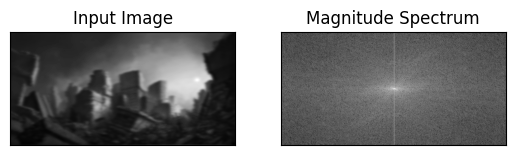

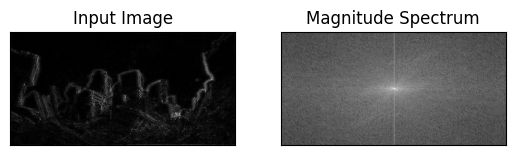

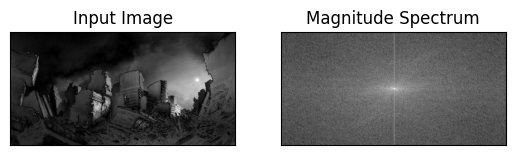

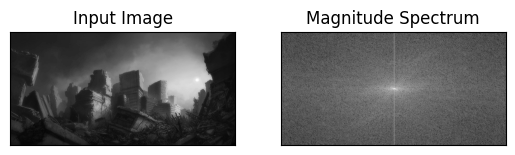

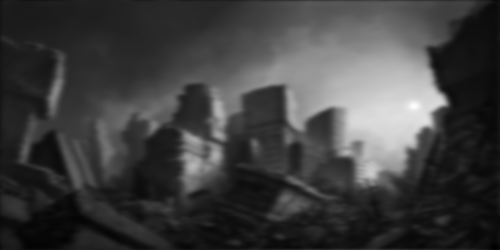

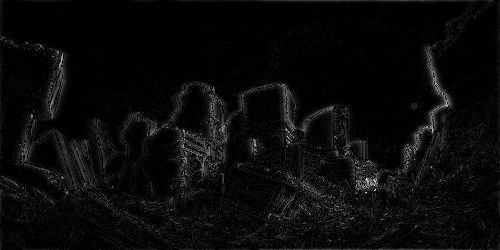

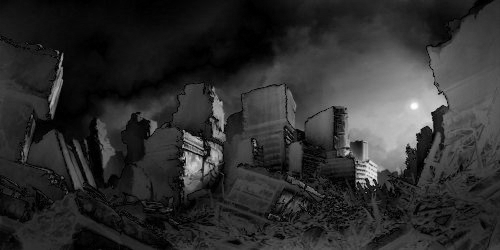

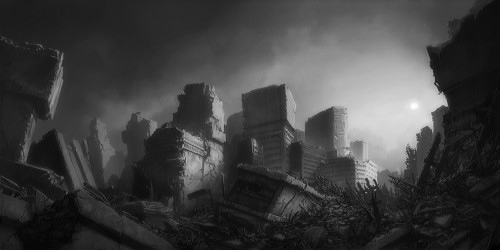

In [ ]:
maskPB = createPB(fft_shift.shape, center=maxLoc, radius=35, lpType=1, n=2)
maskPA = createPA(fft_shift.shape, center=maxLoc, radius=35, lpType=1, n=1)
maskPF = createPF(fft_shift.shape, center=maxLoc, bandCenter=1, bandWidth=400, lpType=2, n=2)
maskRF = createRF(fft_shift.shape, center=maxLoc, bandCenter=50, bandWidth=50, lpType=2, n=2)

# Domínio da frequência
filtered_freq_PB = fft_shift * maskPB
filtered_freq_PA = fft_shift * maskPA
filtered_freq_PF = fft_shift * maskPF
filtered_freq_RF = fft_shift * maskRF

# Inversa da FFT e DFT
f_ishift_PB = np.fft.ifftshift(filtered_freq_PB)
img_back_PB = cv2.idft(f_ishift_PB)
img_back_PB = cv2.magnitude(img_back_PB[:, :, 0], img_back_PB[:, :, 1])

f_ishift_PA = np.fft.ifftshift(filtered_freq_PA)
img_back_PA = cv2.idft(f_ishift_PA)
img_back_PA = cv2.magnitude(img_back_PA[:, :, 0], img_back_PA[:, :, 1])

f_ishift_PF = np.fft.ifftshift(filtered_freq_PF)
img_back_PF = cv2.idft(f_ishift_PF)
img_back_PF = cv2.magnitude(img_back_PF[:, :, 0], img_back_PF[:, :, 1])

f_ishift_RF = np.fft.ifftshift(filtered_freq_RF)
img_back_RF = cv2.idft(f_ishift_RF)
img_back_RF = cv2.magnitude(img_back_RF[:, :, 0], img_back_RF[:, :, 1])

# Converte as imagens inversas p/ float32
img_back_PB = np.array(img_back_PB, dtype=np.float32)
img_back_PA = np.array(img_back_PA, dtype=np.float32)
img_back_PF = np.array(img_back_PF, dtype=np.float32)
img_back_RF = np.array(img_back_RF, dtype=np.float32)

# Plotar a imagem de saída e o espectro de magnitude PB
plt.subplot(121), plt.imshow(img_back_PB, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Plotar a imagem de saída e o espectro de magnitude PA
plt.subplot(121), plt.imshow(img_back_PA, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Plotar a imagem de saída e o espectro de magnitude PF
plt.subplot(121), plt.imshow(img_back_PF, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Plotar a imagem de saída e o espectro de magnitude RF
plt.subplot(121), plt.imshow(img_back_RF, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Normaliza
filtered_img_PB = np.abs(img_back_PB)
filtered_img_PB -= filtered_img_PB.min()
filtered_img_PB = filtered_img_PB * 255.0 / filtered_img_PB.max()
filtered_img_PB = filtered_img_PB.astype(np.uint8)

filtered_img_PA = np.abs(img_back_PA)
filtered_img_PA -= filtered_img_PA.min()
filtered_img_PA = filtered_img_PA * 255.0 / filtered_img_PA.max()
filtered_img_PA = filtered_img_PA.astype(np.uint8)

filtered_img_PF = np.abs(img_back_PF)
filtered_img_PF -= filtered_img_PF.min()
filtered_img_PF = filtered_img_PF * 255.0 / filtered_img_PF.max()
filtered_img_PF = filtered_img_PF.astype(np.uint8)

filtered_img_RF = np.abs(img_back_RF)
filtered_img_RF -= filtered_img_RF.min()
filtered_img_RF = filtered_img_RF * 255.0 / filtered_img_RF.max()
filtered_img_RF = filtered_img_RF.astype(np.uint8)

cv2_imshow(filtered_img_PB)
cv2_imshow(filtered_img_PA)
cv2_imshow(filtered_img_PF)
cv2_imshow(filtered_img_RF)
cv2.waitKey(0)
cv2.destroyAllWindows()

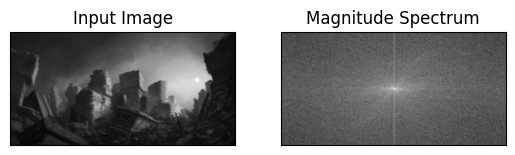

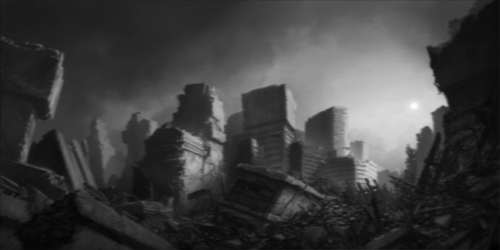

In [ ]:
maskPB = createPB(dft_shift.shape, center=maxLoc, radius=80, lpType=2, n=2)

filtered_freq_PB = fft_shift * maskPB
f_ishift_PB = np.fft.ifftshift(filtered_freq_PB)
img_back_PB = cv2.idft(f_ishift_PB)
img_back_PB = cv2.magnitude(img_back_PB[:, :, 0], img_back_PB[:, :, 1])

img_back_PB = np.array(img_back_PB, dtype=np.float32)

# Plota
plt.subplot(121), plt.imshow(img_back_PB, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Normaliza
filtered_img_PB = np.abs(img_back_PB)
filtered_img_PB -= filtered_img_PB.min()
filtered_img_PB = filtered_img_PB * 255.0 / filtered_img_PB.max()
filtered_img_PB = filtered_img_PB.astype(np.uint8)

cv2_imshow(filtered_img_PB)
cv2.waitKey(0)
cv2.destroyAllWindows()

<ipython-input-11-5a2689ea4594>:32: RuntimeWarning: divide by zero encountered in divide
  lpFilter = 1 / (1 + (radius / d)**(2 * n))


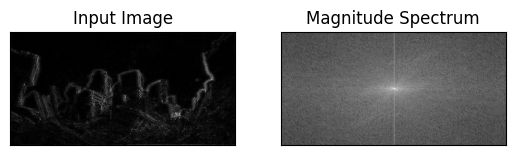

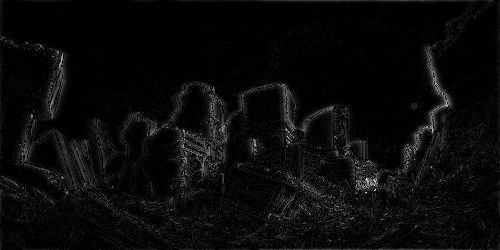

In [ ]:
maskPA = createPA(fft_shift.shape, center=maxLoc, radius=35, lpType=1, n=1)

filtered_freq_PA = fft_shift * maskPA
f_ishift_PA = np.fft.ifftshift(filtered_freq_PA)
img_back_PA = cv2.idft(f_ishift_PA)
img_back_PA = cv2.magnitude(img_back_PA[:, :, 0], img_back_PA[:, :, 1])

img_back_PA = np.array(img_back_PA, dtype=np.float32)

# Plota
plt.subplot(121), plt.imshow(img_back_PA, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Normaliza
filtered_img_PA = np.abs(img_back_PA)
filtered_img_PA -= filtered_img_PA.min()
filtered_img_PA = filtered_img_PA * 255.0 / filtered_img_PA.max()
filtered_img_PA = filtered_img_PA.astype(np.uint8)

cv2_imshow(filtered_img_PA)
cv2.waitKey(0)
cv2.destroyAllWindows()

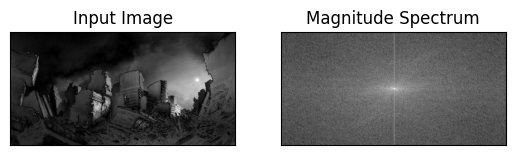

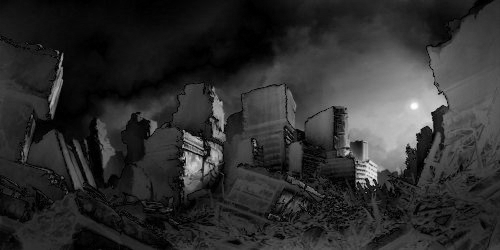

In [ ]:
maskPF = createPF(shape=dft_shift.shape, center=maxLoc, bandCenter=1, bandWidth=400, lpType=2, n=2)

filtered_freq_PF = fft_shift * maskPF
f_ishift_PF = np.fft.ifftshift(filtered_freq_PF)
img_back_PF = cv2.idft(f_ishift_PF)
img_back_PF = cv2.magnitude(img_back_PF[:, :, 0], img_back_PF[:, :, 1])

img_back_PF = np.array(img_back_PF, dtype=np.float32)

# Plota
plt.subplot(121), plt.imshow(img_back_PF, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Normaliza
filtered_img_PF = np.abs(img_back_PF)
filtered_img_PF -= filtered_img_PF.min()
filtered_img_PF = filtered_img_PF * 255.0 / filtered_img_PF.max()
filtered_img_PF = filtered_img_PF.astype(np.uint8)

cv2_imshow(filtered_img_PF)
cv2.waitKey(0)
cv2.destroyAllWindows()

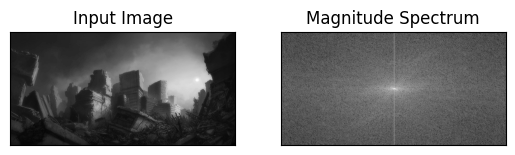

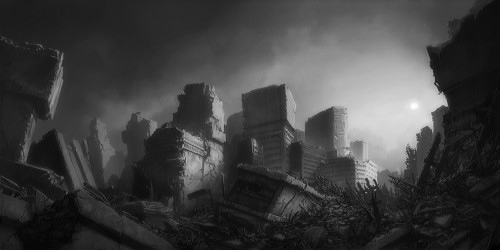

In [ ]:
maskRF = createRF(shape=dft_shift.shape, center=maxLoc, bandCenter=50, bandWidth=50, lpType=2, n=2)

filtered_freq_RF = fft_shift * maskRF
f_ishift_RF = np.fft.ifftshift(filtered_freq_RF)
img_back_RF = cv2.idft(f_ishift_RF)
img_back_RF = cv2.magnitude(img_back_RF[:, :, 0], img_back_RF[:, :, 1])

img_back_RF = np.array(img_back_RF, dtype=np.float32)

# Plota
plt.subplot(121), plt.imshow(img_back_RF, cmap='gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

# Normaliza
img_back_RF = np.array(img_back_RF, dtype=np.float32)
img_back_RF -= img_back_RF.min()
img_back_RF *= 255 / img_back_RF.max()
img_back_RF = img_back_RF.astype(np.uint8)

cv2_imshow(img_back_RF)
cv2.waitKey(0)
cv2.destroyAllWindows()